# Project 1: fys-stk4155
## Part a) 
### (Kode fra oppgaveteksten)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

In [2]:
# Need to make sure this works when y, y_hat and y_tilde are matrices.

# Creating a R2-square fuction:
def R2(y, y_predict):
    C = y-y_predict
    val = sum(sum((y-y_predict))**2)/sum(sum((y-np.mean(y))**2))
    return 1 - val

# Creating a mean square error function:
def MSE(y, y_predict):
    C = y-y_predict
    [n, m] = C.shape
    return sum(sum((C)**2))/(n*m)

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def generateDesignmatrix(p, x, y): 
    m = int((p**2+3*p+2)/2) # returnerer heltall for p = [1:5]
    X = np.zeros((len(x), m))
    X[:,0] = 1
    counter = 1
    for i in range(1, p+1):
        for j in range(i+1):
            X[:,counter] = x**(i-j) * y**j
            counter+=1
    return X

(20, 20)


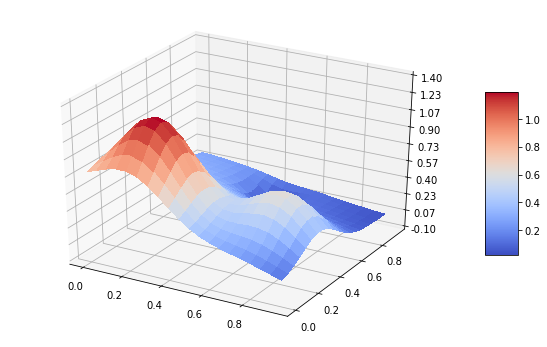

In [3]:
fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

z = FrankeFunction(x, y)
print(z.shape)
# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [4]:
# Initializing X-matrix for fitting a polynomial of degree p 

np.random.seed(1000)
x = np.random.rand(20, )
y = np.random.rand(20, )
x, y = np.meshgrid(x,y)
z = FrankeFunction(x, y)

p = 2 # [1:5]

x = np.random.rand(20, )
y = np.random.rand(20, ) 
  
X = generateDesignmatrix(p,x,y)

z.shape

(20, 20)

In [5]:
# OLS

# Beta matrix consist of the prediction
#beta = np.linalg.inv(X[:,1:].T.dot(X[:,1:])).dot(X[:,1:].T).dot(z)
beta = np.linalg.inv(X.T @ X)@ X.T @ z
z_predict = X@beta # x dot beta

In [6]:
z.shape, z_predict.shape

((20, 20), (20, 20))

In [7]:
MSE(z, z_predict)

0.0515722294546892

In [8]:
R2(z, z_predict)

1.0

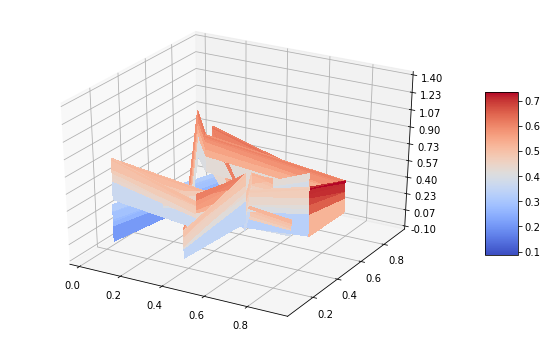

In [9]:

fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(x, y, z_predict, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


# Bootstrap 

In [10]:
def bootstrap(X_train, nrB):
    bootVec = np.zeros(nrB)
    for i in range(nrB):
        bootVec[i] = np.average(np.random.choise(X_train, len(X_train)))
    stdB = np.std(bootVec)
    meanB = np.mean(bootVec)
    varB = np.var(bootVec) 
    # save these in self object -- train_test_slip()..?

# Test

In [11]:
import algorithms
from model_selection import GridSearch #use Gridsearch.fit(x,y)
from model_comparison import model_comparison

In [12]:
np.random.seed(1000)
x = np.random.rand(20, )
y = np.random.rand(20, )
x, y = np.meshgrid(x,y)
z = FrankeFunction(x, y)

p = 2 # [1:5]

x = np.random.rand(20, )
y = np.random.rand(20, ) 
  
X = generateDesignmatrix(p,x,y)

In [13]:
models = {'ridge': algorithms.Ridge, "ols": algorithms.OLS, "lasso": algorithms.Lasso}
param_grid = {'ridge': [0.01, 0.1, 1.0, 10.0], "ols": 0, 'lasso': [0.01, 0.1, 1.0, 10.0]}
    #print(param_grid.items())

random_states = np.arange(40)
# Perform experiment and collect results.

model_results = model_comparison(models, param_grid, 2, x, y, random_states)

Grid search round: 1



ValueError: operands could not be broadcast together with shapes (6,6) (6,20) 

In [ ]:
# name, params = self.param_grid.items()

In [14]:
X = np.random.random((20, 10))

In [83]:
def bootstrap(X, z, random_state):
    
    # For random randint
    np.random.seed(random_state)
    
    nrows, ncols = np.shape(X)
    
    selected_rows = np.random.randint(
        low=0, high=nrows, size=(nrows, ncols)
    )
    selected_cols = np.random.randint(
        low=0, high=ncols, size=(nrows, ncols)
    )
    X_subset = X[selected_rows, selected_cols]
    z_subset = z[selected_rows]
    
    return X_subset, z_subset

In [33]:
X_sub = bootstrap(X, random_state=0)

[12 15  0  3  3  7  9 19 18  4]
[9 7 5 3 4 5 3 3 7 9]


In [76]:
def train_test_split(X, z, split_size=0.2, random_state=None):
    
    # For random choice.
    np.random.seed(random_state)
    
    # Extract number of rows and columns in data matrix.
    nrows, ncols = np.shape(X)
    
    # Determine the proportion of training and test samples
    # from the data matrix size-
    ntest_samples = int(nrows * split_size)
    ntrain_samples = int(nrows - ntest_samples)
    # Randomly select indices for training and test samples 
    # without replacement.
    row_samples = np.arange(nrows)
    selected_train_samples = np.random.choice(
        row_samples, ntrain_samples, replace=False
    )
    selected_test_samples = [
        sample for sample in row_samples 
        if sample not in selected_train_samples
    ]
    # Extract trianing and test samples based on selected
    # indices.
    X_train = X[selected_train_samples, :]
    X_test = X[selected_test_samples, :]
    z_train = z[selected_train_samples]
    z_test = z[selected_test_samples]
    
    return X_train, X_test, z_train, z_test

In [80]:
X_train, X_test, z_train, z_test = train_test_split(X_sub, 2)

In [81]:
# Bootstrap variance
np.var(X_train)

0.0747110934437864

In [84]:
boot_samples = [
    bootstrap(X, y, random_state) for random_state in range(10)
]